## Import Necessary Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data Preprocessing

In [37]:
data = pd.read_csv('data.csv')

In [38]:
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [39]:
print(data.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [40]:
data.fillna(data.mean(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2260\1474580016.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


In [41]:
from scipy import stats
data.drop(columns=['id', 'Unnamed: 32'], inplace=True)
if data.empty:
    raise ValueError("Dataset is empty after dropping columns.")


In [43]:
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
threshold = 3
data = data[(z_scores < threshold).all(axis=1)]
if data.empty:
    raise ValueError("Dataset is empty after removing outliers.")

In [44]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [45]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(348, 30) (88, 30) (348,) (88,)


##   Feature Selection and Engineering

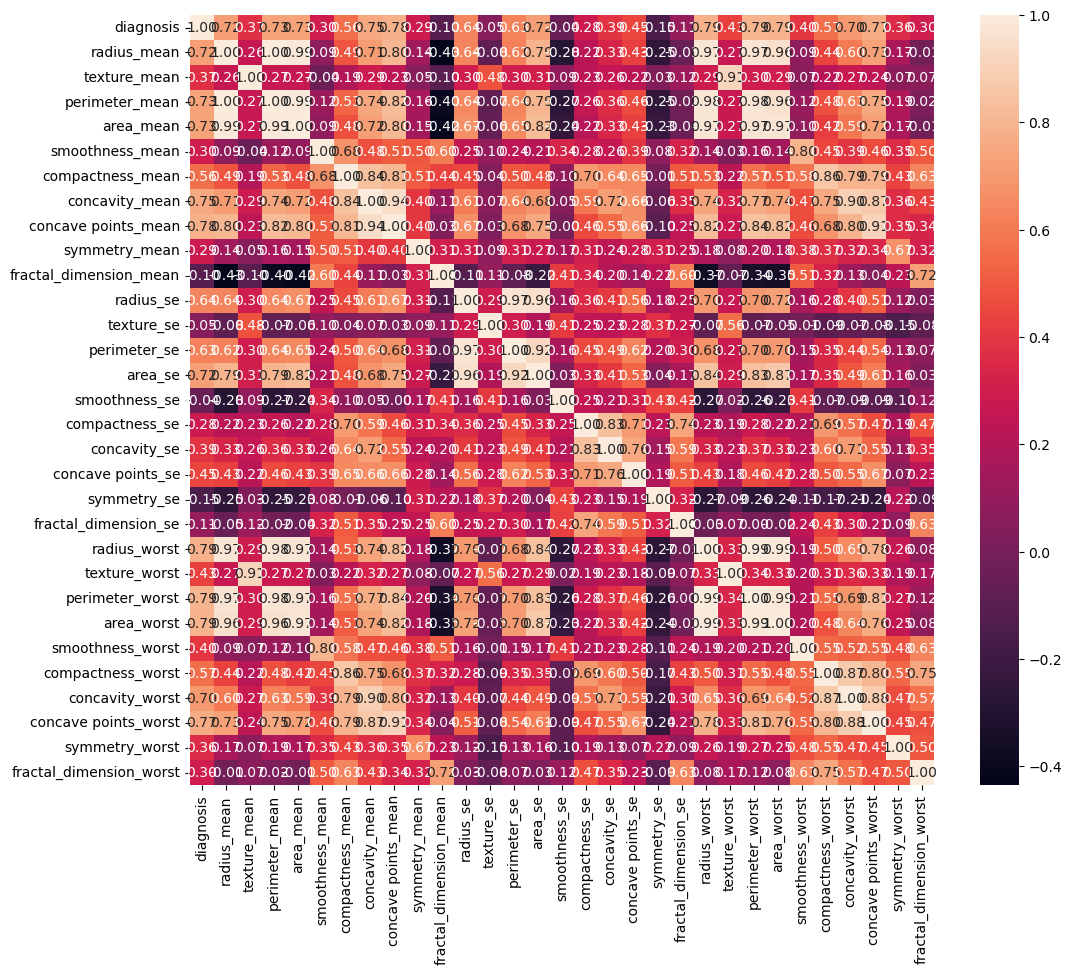

In [47]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [48]:
threshold = 0.8
highly_correlated_features = correlation_matrix.index[abs(correlation_matrix["diagnosis"]) > threshold]
print(highly_correlated_features)

Index(['diagnosis'], dtype='object')


## Machine Learning Model (SVM)

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

svm_model = SVC(kernel='linear', probability=True) 
svm_model.fit(X_train_sel, y_train_sel)

y_pred = svm_model.predict(X_test_sel)
y_pred_proba = svm_model.predict_proba(X_test_sel)[:, 1]

In [56]:
# Evaluate the model
accuracy = accuracy_score(y_test_sel, y_pred)
precision = precision_score(y_test_sel, y_pred)
recall = recall_score(y_test_sel, y_pred)
f1 = f1_score(y_test_sel, y_pred)
roc_auc = roc_auc_score(y_test_sel, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.94
Precision: 0.94
Recall: 0.89
F1-score: 0.92
ROC AUC: 0.99


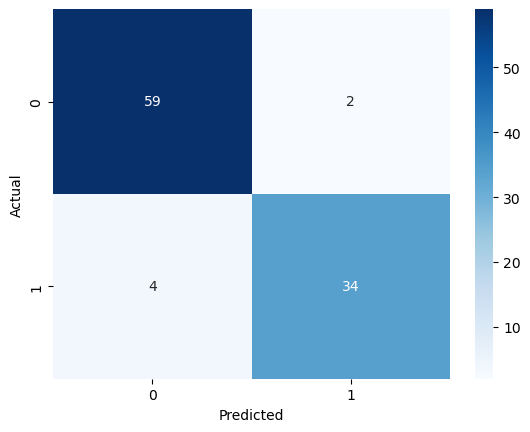

In [55]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_sel, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()